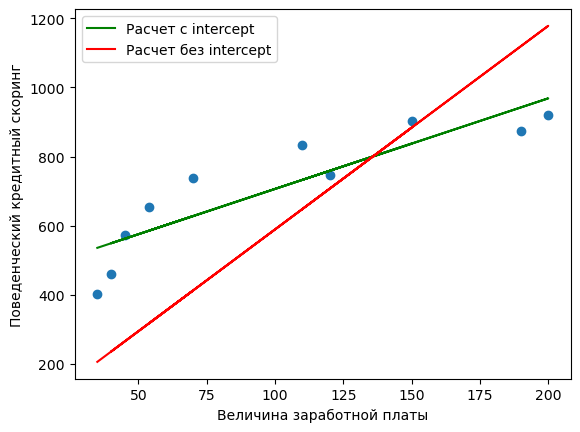

In [18]:
# Задача 1. Даны значения величины заработной платы заемщиков банка
# (zp) и значения их поведенческого кредитного скоринга (ks):
# zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
# ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
# Используя математические операции, посчитать коэффициенты линейной
# регрессии, приняв за X заработную плату (то есть, zp - признак),
# а за y - значения скорингового балла (то есть, ks - целевая переменная). 
# Произвести расчет как с использованием intercept, так и без.

import numpy as np
import matplotlib.pyplot as plot

zp_data = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks_data = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Расчет с использованием intercept

n = len(ks_data)

b1 = (np.mean(zp_data * ks_data) - np.mean(zp_data) * np.mean(ks_data)) / (np.mean(zp_data ** 2) - np.mean(zp_data) ** 2)

b0 = np.mean(ks_data) - b1 * np.mean(zp_data)

y_pred = b0 + b1 * zp_data

mse = np.sum(((b0 + b1 * zp_data) - ks_data) ** 2 / n) # Среднеквадратическая ошибка

mse = ((ks_data - y_pred)**2).sum() / n

# Расчет без использования intercept

zp1_data = zp_data.reshape(1, n)
ks1_data = ks_data.reshape(1, n)
b1 = np.dot(np.dot(np.linalg.inv(np.dot(zp1_data, zp1_data.T)), zp1_data), ks1_data.T)[0][0]

y_pred1 = b1 * zp_data

plot.scatter(zp_data, ks_data)
plot.xlabel('Величина заработной платы')
plot.ylabel('Поведенческий кредитный скоринг')
plot.plot(zp_data, y_pred, 'g', label = 'Расчет с intercept')
plot.plot(zp_data, y_pred1, 'r', label = 'Расчет без intercept')
plot.legend()
plot.show()



In [17]:
# Задача 2. Посчитать коэффициент линейной регрессии
# при заработной плате (zp), используя градиентный
# спуск (без intercept).

zp_data = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks_data = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = len(zp_data)

def mse(b, x_data, y_data):
    
    return np.sum((b * x_data - y_data) ** 2) / len(x_data)

mse(2.62, zp_data, ks_data)

# Расчет функции потерь

def mse_p(b, x, y):
    
    return (2 / len(x)) * np.sum((b * x - y) * x)

# Расчет параметра - скорость обучения 

alpha = 1e-06
b = 0.1
mse_min = mse(b, zp_data, ks_data)
i_min = 1
b_min = b

for i in range(10000):
    
    b -= alpha * mse_p(b, zp_data, ks_data)
    
    if i%100 == 0:
        
        print(f'Итерация номер {i}, b={b}, mse={mse(b, zp_data, ks_data)};')
    
    if mse(b, zp_data, ks_data) > mse_min:
        
        print(f'На итерации номер {i_min}, b={b_min}, mse={mse_min} достигнут минимум - {b_min}.')
        print(f'Вывод: коэффициент линейной регрессии равен {b_min}.')
        
        break
    
    else:
        mse_min = mse(b, zp_data, ks_data)
        i_min = i
        b_min = b

Итерация номер 0, b=0.25952808000000005, mse=493237.7212546963;
Итерация номер 100, b=5.54537842245223, mse=58151.31823171113;
Итерация номер 200, b=5.868748638669329, mse=56522.97550129376;
Итерация номер 300, b=5.888531320728348, mse=56516.88130936019;
Итерация номер 400, b=5.8897415574471985, mse=56516.85850140053;
Итерация номер 500, b=5.889815595583751, mse=56516.858416040064;
Итерация номер 600, b=5.889820124983314, mse=56516.85841572062;
На итерации номер 628, b=5.889820285147628, mse=56516.85841571966 достигнут минимум - 5.889820285147628.
Вывод: коэффициент линейной регрессии равен 5.889820285147628.


Итерация номер 0, a=0.169966, b=8.07468054476, mse=122318.06397097567;
Итерация номер 50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801;
Итерация номер 100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364;
Итерация номер 150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794;
Итерация номер 200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443;
Итерация номер 250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746;
Итерация номер 300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141;
Итерация номер 350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385;
Итерация номер 400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555;
Итерация номер 450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183;
Итерация номер 500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699;
На итерации номер 520164, a=444.176531637

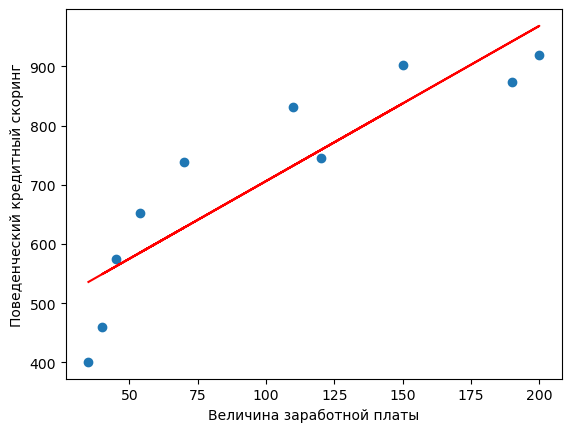

In [20]:
# Задача 3. Произвести вычисления как в пункте 2,
# но с вычислением intercept. Учесть, что изменение
# коэффициентов должно производиться на каждом шаге
# одновременно (то есть изменение одного коэффициента
# не должно влиять на изменение другого во время одной итерации).

zp_data = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks_data = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Расчет функции потерь

def mse_ab(a, b, x, y):
    
    return np.sum(((a + b * x) - y) ** 2) / len(x)

# Расчет функции потерь по a

def mse_a(a, b, x, y): 
    
    return 2 * np.sum((a + b * x) - y) / len(x)

# Расчет функции потерь по b

def mse_b(a, b,x,y):
    
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

# Скорость обучения

alpha = 5e-05
b = 0.1
a = 0.1
mse_ab_min = mse_ab(a, b, zp_data, ks_data)

i_min = 1
b_min = b
a_min = a
   
for i in range(1000000):
    
    a -= alpha * mse_a(a, b, zp_data, ks_data)
    
    b -= alpha * mse_b(a, b, zp_data, ks_data)
    
    if i%50000 == 0:
        
        print(f'Итерация номер {i}, a={a}, b={b}, mse={mse_ab(a, b, zp_data, ks_data)};')
    
    if mse_ab(a, b, zp_data, ks_data) > mse_ab_min:
        
        print(f'На итерации номер {i_min}, a={a_min}, b={b_min}, mse={mse_ab_min} достигнут минимум - {b_min}.')
        print(f'Вывод: коэффициенты линейной регрессии равны {a_min} и {b_min}.')
        
        break
    
    else:
        mse_ab_min = mse_ab(a, b, zp_data, ks_data)
        i_min = i
        b_min = b
        a_min = a

plot.scatter(zp_data, ks_data)
plot.plot(zp_data, a_min + b_min * zp_data, c = 'r')
plot.xlabel('Величина заработной платы')
plot.ylabel('Поведенческий кредитный скоринг')
plot.show()